In [53]:
import pandas as pd

# Chemin vers votre fichier compressé
chemin_fichier = '../data/OnBigTable/one_big_table.csv.gz'

# Lecture directe en précisant le type de compression
df = pd.read_csv(chemin_fichier, compression='gzip', 
                 sep=',',        # ou '\t' si c'est un TSV
                 encoding='utf-8', # à ajuster si nécessaire
                 low_memory=False) # optionnel, pour éviter les warnings

# On travaille sur l'onglet description
df['DESCRIPTION']

0        Business Intelligence Analyst - (H/F) - En alt...
1        Description du poste : Nous recherchons un con...
2        Description du poste : En tant qu'organisateur...
3        Description du poste Dans un contexte de crois...
4        Intégrée à une Holding de plus de 1000 collabo...
                               ...                        
34536    Informations générales Référence 2025-3790 Mét...
34537    Description du poste : Dans le cadre de notre ...
34538    Description : Au sein de l'équipe projet, vous...
34539    Nous recherchons pour notre client, acteur dan...
34540    Au sein de notre équipe informatique, vous jou...
Name: DESCRIPTION, Length: 34541, dtype: object

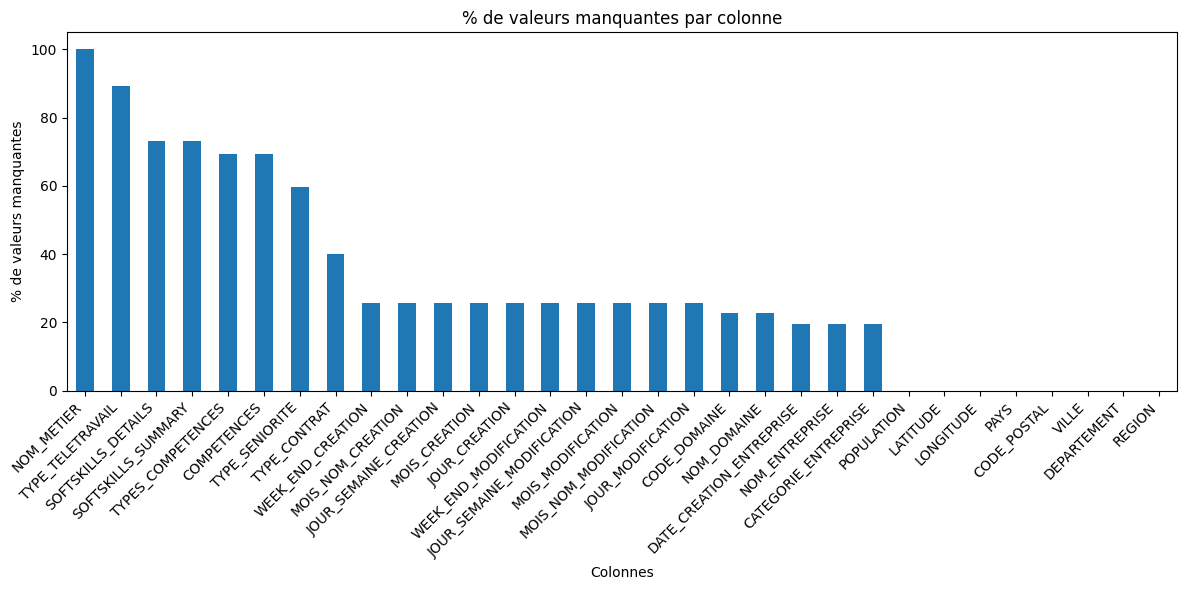

,ID_LOCAL,TITLE,DESCRIPTION,TYPE_CONTRAT,CODE_DOMAINE,NOM_DOMAINE,CODE_POSTAL,VILLE,DEPARTEMENT,REGION,...,TYPE_SENIORITE,CODE_ROME,NOM_METIER,NOM_ENTREPRISE,CATEGORIE_ENTREPRISE,DATE_CREATION_ENTREPRISE,COMPETENCES,TYPES_COMPETENCES,SOFTSKILLS_SUMMARY,SOFTSKILLS_DETAILS
0,5168154800,Business Intelligence Analyst - (H/F) - En alt...,Business Intelligence Analyst - (H/F) - En alt...,Alternance,NaN,NaN,62170.0,Wailly-Beaucamp,Pas-de-Calais,Hauts-de-France,...,NaN,M1806,NaN,OPENCLASSROOMS,ETI,2007-01-20,Business Intelligence,Data Analytics,"Avoir l’esprit d’équipe, Capacité d’adaptation...",Avoir une propension à agencer et structurer s...
1,5091456057,CONSULTANT BUSINESS INTELLIGENCE / INFORMATIQU...,Description du poste : Nous recherchons un con...,CDI,K14,Conception et mise en oeuvre des politiques pu...,31500.0,Toulouse,Haute-Garonne,Occitanie,...,NaN,M1806,NaN,KAPA IT,PME,2008-03-28,NaN,NaN,"Avoir l’esprit d’équipe, Capacité d’adaptation...",Avoir une propension à agencer et structurer s...
2,5109227,Consultant fonctionnel ERP (H/F),Description du poste : En tant qu'organisateur...,CDI,H12,"Conception, recherche, études et développement",69110.0,Sainte-Foy-lès-Lyon,Rhône,Auvergne-Rhône-Alpes,...,Senior,M1806,NaN,NaN,NaN,NaN,Supply Chain Management,Supply Chain,"Avoir l’esprit d’équipe, Capacité d’adaptation...",Avoir une propension à agencer et structurer s...
3,5149049679,Inspecteur Ouvrages d'Art (débutant/Expériment...,Description du poste Dans un contexte de crois...,CDI,H12,"Conception, recherche, études et développement",37320.0,Truyes,Indre-et-Loire,Centre-Val de Loire,...,NaN,M1807,NaN,SITES,PME,2009-10-28,Chef,Configuration Management,"Avoir l’esprit d’équipe, Capacité d’adaptation...",Avoir une propension à agencer et structurer s...
4,4955082539,Maçon Finisseur H/F,Intégrée à une Holding de plus de 1000 collabo...,CDI,NaN,NaN,75008.0,Paris,Paris,Île-de-France,...,NaN,M1807,NaN,NaN,NaN,NaN,NaN,NaN,"Avoir l’esprit d’équipe, Capacité d’adaptation...",Avoir une propension à agencer et structurer s...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34536,5166045444,Thèse Glissement de terrain IRIMA PC-Outremer ...,Informations générales Référence 2025-3790 Mét...,NaN,K15,Contrôle public,33400.0,Talence,Gironde,Nouvelle-Aquitaine,...,Senior,M1808,NaN,BRGM,ETI,1958-01-01,NaN,NaN,NaN,NaN
34537,5105260,Assistant / Assistante chef de projet informat...,Description du poste : Dans le cadre de notre ...,CDI,M13,Direction d'entreprise,35700.0,Rennes,Ille-et-Vilaine,Bretagne,...,Senior,M1814,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34538,3941669,CHEF DE PROJET DEPLOIEMENT SYSTÈME - H/F,"Description : Au sein de l'équipe projet, vous...",CDI,H11,Affaires et support technique client,13780.0,Riboux,Var,Provence-Alpes-Côte d'Azur,...,Senior,M1828,NaN,ILIAD,GE,1987-10-15,"BDD, Linux, VMware","Operating System, Software Testing, Virtualiza...",NaN,NaN
34539,5641232,Agent / Agente d'exploitation informatique (H/F),"Nous recherchons pour notre client, acteur dan...",Intérim,G12,Animation d'activités de loisirs,77610.0,Châtres,Seine-et-Marne,Île-de-France,...,Senior,M1810,NaN,GOJOB,ETI,2015-09-07,NaN,NaN,NaN,NaN


In [55]:
# 2. Visualisation des manquants
import matplotlib.pyplot as plt

missing_count = df.isnull().sum()
missing_pct = (missing_count / len(df)) * 100
missing_pct = missing_pct[missing_pct > 0]

plt.figure(figsize=(12, 6))
missing_pct.sort_values(ascending=False).plot.bar()
plt.title('% de valeurs manquantes par colonne')
plt.xlabel('Colonnes')
plt.ylabel('% de valeurs manquantes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


df

In [7]:
# 1. Passage en minuscules
df['DESCRIPTION'] = df['DESCRIPTION'].str.lower()

# Vérifions le résultat
df['DESCRIPTION'].head(5)


0    ltd international est un cabinet de recrutemen...
1    administrateur systèmes, réseaux et cybersécur...
2    au sein d'une des filiales d'ey, artois, son c...
3    vos missions ? intégré à nos équipes sur notre...
4    nous recherchons un administrateur/ingénieur s...
Name: DESCRIPTION, dtype: object

In [8]:
import unicodedata

#On enlève les accents 
def strip_accents(text):
    # Normalisation Unicode, puis on retire les marques diacritiques
    text = unicodedata.normalize('NFD', text)
    return ''.join(ch for ch in text if unicodedata.category(ch) != 'Mn')

# Application à la colonne
df['DESCRIPTION'] = df['DESCRIPTION'].apply(strip_accents)

# Vérification
df['DESCRIPTION'].head(5)


0    ltd international est un cabinet de recrutemen...
1    administrateur systemes, reseaux et cybersecur...
2    au sein d'une des filiales d'ey, artois, son c...
3    vos missions ? integre a nos equipes sur notre...
4    nous recherchons un administrateur/ingenieur s...
Name: DESCRIPTION, dtype: object

In [9]:
import re

def clean_punct(text):
    # On remplace tout ce qui n'est pas lettre, espace ou apostrophe par un espace
    text = re.sub(r"[^a-zA-Z\s']", " ", text)
    # On contracte plusieurs espaces en un seul
    text = re.sub(r'\s+', ' ', text)
    return text.strip()

# Application à la colonne
df['DESCRIPTION'] = df['DESCRIPTION'].apply(clean_punct)

# Vérification
df['DESCRIPTION'].head(5)


0    ltd international est un cabinet de recrutemen...
1    administrateur systemes reseaux et cybersecuri...
2    au sein d'une des filiales d'ey artois son cen...
3    vos missions integre a nos equipes sur notre f...
4    nous recherchons un administrateur ingenieur s...
Name: DESCRIPTION, dtype: object

In [10]:
!pip install spacy
!python -m spacy download fr_core_news_sm


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.2/29.2 MB 31.4 MB/s eta 0:00:00m eta 0:00:010:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.3/45.3 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.3/50.3 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 33.8 MB/s eta 0:00:00
  Using cached tqdm-4.67.1-py3-none-any.whl (78 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.9/156.9 kB 19.5 MB/s eta 0:00:00
  Using cached pydantic-2.11.4-py3-none-any.whl (443 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 36.4 MB/s eta 0:00:00m eta 0:00:010:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.0/183.0 kB 23.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.8/204.8 kB 23.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.3/124.3 kB 17.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 41.1 MB/s eta 0:00:00m eta 0:00:010:00:01
  Using cached typing_inspect

In [11]:
import spacy

# Chargement du modèle français (on désactive lener et leparser pour accélérer)
nlp = spacy.load('fr_core_news_sm', disable=['parser', 'ner'])

# Liste de stop-words intégrée
stopwords = nlp.Defaults.stop_words

def tokenize_and_remove_stop(text):
    doc = nlp(text)
    tokens = []
    for token in doc:
        # on ignore les stop-words, les espaces et les tokens d'une lettre
        if token.text in stopwords or token.is_space or len(token.text) < 2:
            continue
        tokens.append(token.lemma_)  # on récupère le lemme
    return tokens

# Application à la colonne
df['TOKENS'] = df['DESCRIPTION'].apply(tokenize_and_remove_stop)

# Vérification
df[['DESCRIPTION', 'TOKENS']].head(5)


,DESCRIPTION,TOKENS
0,ltd international est un cabinet de recrutemen...,"[ltd, international, cabinet, recrutement, age..."
1,administrateur systemes reseaux et cybersecuri...,"[administrateur, systeme, reseal, cybersecurit..."
2,au sein d'une des filiales d'ey artois son cen...,"[sein, filiale, ey, artois, centre, operationn..."
3,vos missions integre a nos equipes sur notre f...,"[mission, integre, equipe, factory, client, in..."
4,nous recherchons un administrateur ingenieur s...,"[rechercher, administrateur, ingenieur, system..."


In [15]:
df['DESCRIPTION_CLEAN'] = df['TOKENS'].apply(lambda toks: ' '.join(toks))
df[['TOKENS', 'DESCRIPTION_CLEAN']].head(5)



,TOKENS,DESCRIPTION_CLEAN
0,"[ltd, international, cabinet, recrutement, age...",ltd international cabinet recrutement agence t...
1,"[administrateur, systeme, reseal, cybersecurit...",administrateur systeme reseal cybersecurite al...
2,"[sein, filiale, ey, artois, centre, operationn...",sein filiale ey artois centre operationnel exc...
3,"[mission, integre, equipe, factory, client, in...",mission integre equipe factory client interven...
4,"[rechercher, administrateur, ingenieur, system...",rechercher administrateur ingenieur systeme re...


In [18]:
pip install scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 42.9 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.7/307.7 kB 36.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.7/37.7 MB 28.6 MB/s eta 0:00:00m eta 0:00:010:00:01

[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [21]:
from sklearn.model_selection import train_test_split

X = df['DESCRIPTION_CLEAN']
y = df['CODE_ROME']  # adapte selon ta cible
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)


In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),        # tu peux régler max_features, ngram_range…
    ('clf', LogisticRegression(max_iter=500))
])

# Entraînement
pipeline.fit(X_train, y_train)

# Évaluation rapide
print("Train score :", pipeline.score(X_train, y_train))
print("Test  score :", pipeline.score(X_test,  y_test))


Train score : 0.75
Test  score : 0.6692719641047908


In [23]:
#Nuage de mot 

!pip install wordcloud


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.1/511.1 kB 3.6 MB/s eta 0:00:002.3 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 37.4 MB/s eta 0:00:00m eta 0:00:010:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 27.2 MB/s eta 0:00:00m eta 0:00:010:01
  Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
  Using cached kiwisolver-1.4.8-cp310-cp310-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (1.6 MB)
  Using cached fonttools-4.57.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (4.6 MB)
  Using cached pyparsing-3.2.3-py3-none-any.whl (111 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 325.0/325.0 kB 41.7 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


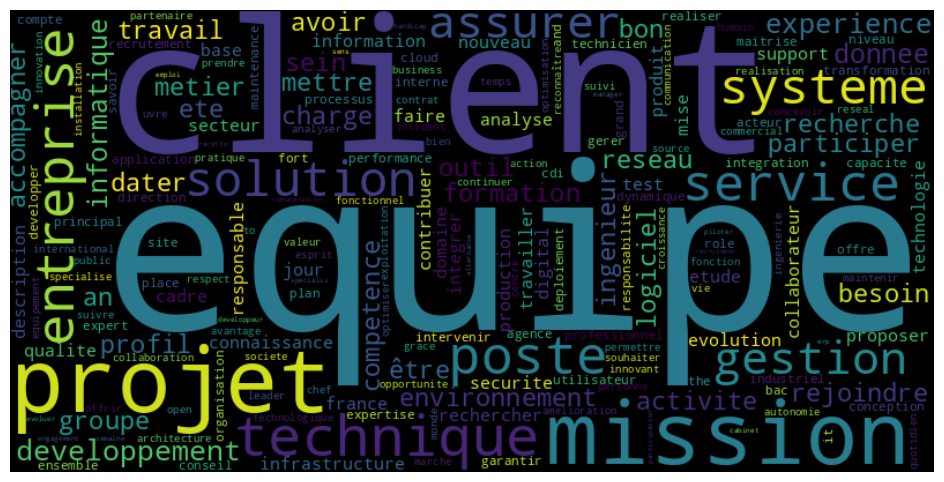

In [24]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Aplatir la liste de tokens et calculer les fréquences
all_tokens = df['TOKENS'].explode()
freqs = all_tokens.value_counts().to_dict()

# Génération du nuage de mots (taille 800×400)
wc = WordCloud(width=800, height=400).generate_from_frequencies(freqs)

# Affichage
plt.figure(figsize=(12, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()


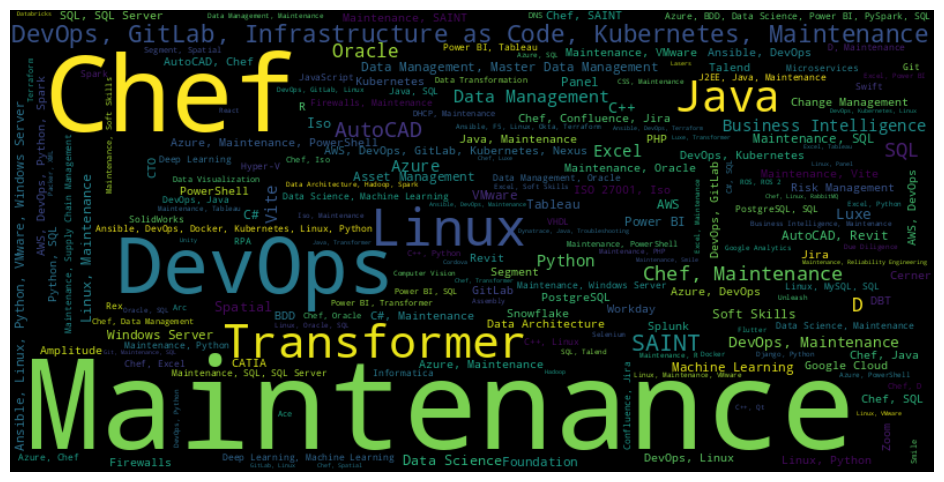

In [26]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Aplatir la liste de tokens et calculer les fréquences
all_tokens = df['COMPETENCES'].explode()
freqs = all_tokens.value_counts().to_dict()

# Génération du nuage de mots (taille 800×400)
wc = WordCloud(width=800, height=400).generate_from_frequencies(freqs)

# Affichage
plt.figure(figsize=(12, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [37]:
from sklearn.model_selection import train_test_split

X = df['DESCRIPTION_CLEAN']
y = df['CODE_ROME']  # adapte selon ta cible
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)



from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),        # tu peux régler max_features, ngram_range…
    ('clf', LogisticRegression(max_iter=500))
])

# Entraînement
pipeline.fit(X_train, y_train)

# Évaluation rapide
print("Train score :", pipeline.score(X_train, y_train))
print("Test  score :", pipeline.score(X_test,  y_test))


Train score : 0.75
Test  score : 0.6692719641047908


In [34]:
df.columns

Index(['ID_LOCAL', 'ID_CONTRAT', 'ID_DOMAINE', 'ID_LIEU', 'ID_DATE_CREATION',
       'ID_DATE_MODIFICATION', 'ID_ENTREPRISE', 'ID_TELETRAVAIL',
       'ID_SENIORITE', 'ID_ROME', 'TITLE', 'DESCRIPTION', 'TYPE_CONTRAT',
       'CODE_DOMAINE', 'NOM_DOMAINE', 'CODE_POSTAL', 'VILLE', 'DEPARTEMENT',
       'REGION', 'PAYS', 'LATITUDE', 'LONGITUDE', 'POPULATION',
       'MOIS_CREATION', 'JOUR_CREATION', 'MOIS_NOM_CREATION',
       'JOUR_SEMAINE_CREATION', 'WEEK_END_CREATION', 'MOIS_MODIFICATION',
       'JOUR_MODIFICATION', 'MOIS_NOM_MODIFICATION',
       'JOUR_SEMAINE_MODIFICATION', 'WEEK_END_MODIFICATION',
       'TYPE_TELETRAVAIL', 'TYPE_SENIORITE', 'CODE_ROME', 'NOM_METIER',
       'COMPETENCES', 'TYPES_COMPETENCES', 'SOFTSKILLS_SUMMARY',
       'SOFTSKILLS_DETAILS', 'TOKENS', 'DESCRIPTION_CLEAN'],
      dtype='object')

In [38]:
!pip install sentence-transformers


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.7/345.7 kB 2.6 MB/s eta 0:00:002.4 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 865.2/865.2 MB 2.4 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 30.0 MB/s eta 0:00:00m eta 0:00:01:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.3/484.3 kB 19.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.4/194.4 kB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 MB 26.9 MB/s eta 0:00:00m eta 0:00:010:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 31.9 MB/s eta 0:00:00m eta 0:00:010:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.2/158.2 MB 9.0 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 20.5 MB/s eta 0:00:00m eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 393.1/393.1 MB 6.0 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [39]:
from sentence_transformers import SentenceTransformer

# Charge le modèle depuis Hugging Face
model = SentenceTransformer(
    'sentence-transformers/distilbert-base-nli-stsb-mean-tokens'
)


/home/ilanlp/.pyenv/versions/3.10.13/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [56]:
# Extraire les listes train/test de chaînes
texts_train = X_train.tolist()
texts_test  = X_test.tolist()



IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [43]:
# Convertir chaque texte en embedding
emb_train = model.encode(
    texts_train,
    batch_size=32,
    show_progress_bar=True,
    convert_to_numpy=True
)
emb_test  = model.encode(
    texts_test,
    batch_size=32,
    show_progress_bar=True,
    convert_to_numpy=True
)

print("Train embeddings :", emb_train.shape)  # ex. (22000, 768)
print("Test  embeddings :", emb_test .shape)  # ex. ( 5500, 768)

Batches: 100%|███████████████████████████████████████████████████████████████████████████| 216/216 [11:02<00:00,  3.07s/it]

Train embeddings : (27632, 768)
Test  embeddings : (6909, 768)


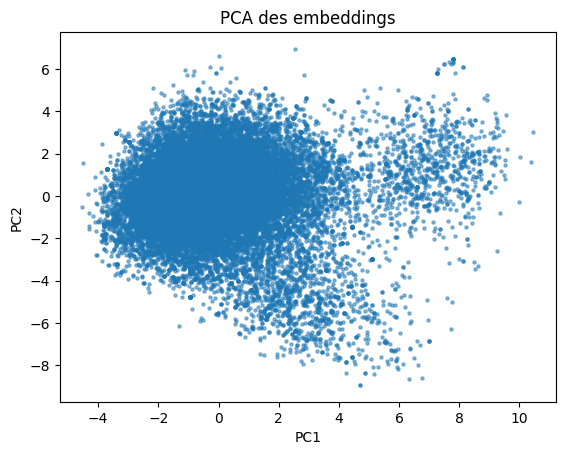

In [45]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X2 = pca.fit_transform(emb_train)

plt.scatter(X2[:,0], X2[:,1], s=5, alpha=0.5)
plt.title("PCA des embeddings")
plt.xlabel("PC1"); plt.ylabel("PC2")
plt.show()



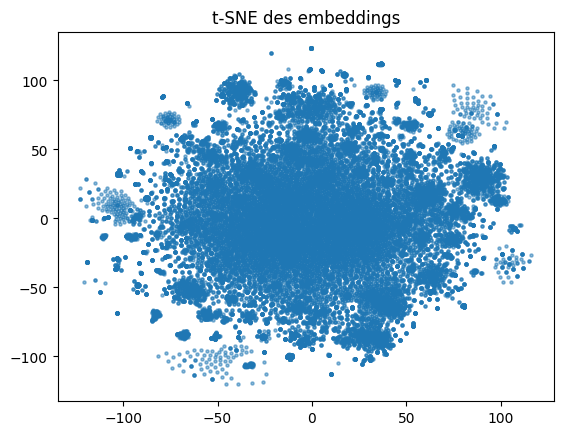

In [46]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X2 = tsne.fit_transform(emb_train)

plt.scatter(X2[:,0], X2[:,1], s=5, alpha=0.5)
plt.title("t-SNE des embeddings")
plt.show()


In [47]:
from sklearn.cluster import KMeans

k = 10  # nombre de clusters que vous souhaitez tester
km = KMeans(n_clusters=k, random_state=42)
clusters = km.fit_predict(emb_train)

# Combiner avec vos textes
import pandas as pd
df_clusters = pd.DataFrame({
    'text': texts_train,
    'cluster': clusters
})

# Afficher quelques exemples par cluster
for c in range(k):
    print(f"\n=== Cluster {c} ===")
    print(df_clusters[df_clusters.cluster == c].text.sample(3).tolist())



=== Cluster 0 ===
['rejoindre equipe talentueux contribuer projet innovant recruteur externe accompagner entreprise rochelle recherche developpeur euse net cdi client acteur conception application logiciel entreprise reconnaître expertise dynamisme accompagner client prestigieux annee rejoindre equipe passionne lead developpeur chef projet administrateur syst', 'opportunite pourvoir scrum master banque decouvrer vie apsidienn devenir apsidien sein dsi travailler lien equipe front client api service back office client travailler mode agile methodologie safe agile echelle secteur banqu methode travail safe mission rechercher scrum master couvrir mission organiser ceremonie planifier sp', 'societe incontournable marche recrutement francai ltd cabinet recrutement agence travail temporaire specialis metier ingenierie entreprise poste mission etude technique faisabilite dimension production solaire equipement compatible securite determiner emplacement optimer conception installation electri

In [48]:
from sklearn.metrics import silhouette_score
score = silhouette_score(emb_train, clusters)
print("Silhouette score :", score)


Silhouette score : 0.04596779


In [49]:
!pip install bertopic


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.6/150.6 kB 1.2 MB/s eta 0:00:00 MB/s eta 0:00:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 1.1 MB/s eta 0:00:0071.4 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.8/14.8 MB 9.8 MB/s eta 0:00:000m eta 0:00:010:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 13.4 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 338.4/338.4 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 14.4 MB/s eta 0:00:00m eta 0:00:010:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 707.3 kB/s eta 0:00:00 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.4/42.4 MB 8.7 MB/s eta 0:00:000m eta 0:00:010:00:01

[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [50]:
from bertopic import BERTopic

topic_model = BERTopic(verbose=True)
topics, probs = topic_model.fit_transform(texts_train, emb_train)

# Voir les thèmes
print(topic_model.get_topic_info().head(10))

# Mots-clés du topic 0
print(topic_model.get_topic(0))


2025-05-09 12:33:06,823 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-05-09 12:36:08,369 - BERTopic - Dimensionality - Completed ✓
2025-05-09 12:36:08,373 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-05-09 12:36:41,675 - BERTopic - Cluster - Completed ✓
2025-05-09 12:36:41,728 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-05-09 12:36:58,006 - BERTopic - Representation - Completed ✓


   Topic  Count                                           Name  \
0     -1  10073          -1_informatique_equipe_gestion_donnee   
1      0    708                                0_and_the_to_of   
2      1    598                       1_chef_projet_fe_piloter   
3      2    481    2_analyst_business_fonctionnel_intelligence   
4      3    423              3_cuisine_plat_cuisinier_cuisiner   
5      4    304         4_aeronautiqu_aeronautique_essai_avion   
6      5    295            5_logiciel_validation_test_embarque   
7      6    261            6_hospitalier_medical_patient_sante   
8      7    256  7_cybersecurite_securite_cyber_administrateur   
9      8    201          8_commercial_marketing_vente_prospect   

                                      Representation  \
0  [informatique, equipe, gestion, donnee, techni...   
1    [and, the, to, of, our, in, we, for, with, you]   
2  [chef, projet, fe, piloter, pilotage, equipe, ...   
3  [analyst, business, fonctionnel, intelligence,

In [51]:
from sklearn.neighbors import NearestNeighbors

nn = NearestNeighbors(n_neighbors=5, metric='cosine').fit(emb_train)

query = "développeur Python backend"
q_emb = model.encode([query], convert_to_numpy=True)
distances, indices = nn.kneighbors(q_emb)

for idx, dist in zip(indices[0], distances[0]):
    print(f"- {texts_train[idx]} (dist={dist:.3f})")


- python initiation fonctionnalite base metier concerne python developpeur python utilis creer application logiciel automatiser tache developper script domaine dater scientist analyser exploiter grand quantite donnee grace python bibliotheque specialisee panda numpy developpeur web python concu developper application web api utiliser framework django (dist=0.219)
- contexte mission rechercher profil developpeur backend python experiment accompagner equipe projet developpement solution integrer brique ia interfacer systeme tiers profil ideal rigoureux pragmatique debrouillard capable intervenir sujet parallele lien direct equipe metier environnement iteratif objectif responsabiliter developpemer fonctionnalite metier (dist=0.250)
- contexte mission rechercher profil developpeur backend python experiment accompagner equipe projet developpement solution integrer brique ia interfacer systeme tiers profil ideal rigoureux pragmatique debrouillard capable intervenir sujet parallele lien direc

In [57]:
# 1) Transformer en DataFrame
df_emb_train = pd.DataFrame(emb_train)
df_emb_test  = pd.DataFrame(emb_test)

# 2) Sauvegarder dans des CSV (colonnes nommées automatiquement 0,1,2,…,767)
df_emb_train.to_csv('emb_train.csv', index=False)
df_emb_test .to_csv('emb_test.csv',  index=False)